In [1]:
isLocalServer = True
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID_model_rebuild/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd
!nvidia-smi

isLocalServer is True
/notebook/personal/ksuchoi216/FaceID_model_rebuild
Tue Oct 18 14:15:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   33C    P0    33W / 250W |   3237MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla P1

# PCA

In [26]:
from data_preprocessing import loadNumpy
from utils import show_dimension_reduction

user_names = ["jhyoo", "jhoh", "jhongyoo", "kschoi"]

emb = loadNumpy('data', 'extracted_org','face_emb.npy')
lb = loadNumpy('data', 'extracted_org', 'face_lb.npy')

print(f'shape: {emb.shape} {lb.shape}')

# show_dimension_reduction(emb, lb, isLDA=False)
# show_dimension_reduction(emb, lb, isLDA=True)

print(emb.shape)
num = len(lb[lb==0])//2

import numpy as np
emb_ = emb[num:, :]
lb_ = lb[num:]

print(emb_.shape, lb_.shape)
show_dimension_reduction(emb_, lb_, isLDA=True)





loading from ./data/extracted_org/face_emb.npy
loading from ./data/extracted_org/face_lb.npy
shape: (1157, 512) (1157,)
(1157, 512)
(1008, 512) (1008,)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1157 and the array at index 2 has size 1008

<Figure size 1440x720 with 0 Axes>

# Screegraph

x: (1157, 512) projected_x: (1157, 512)


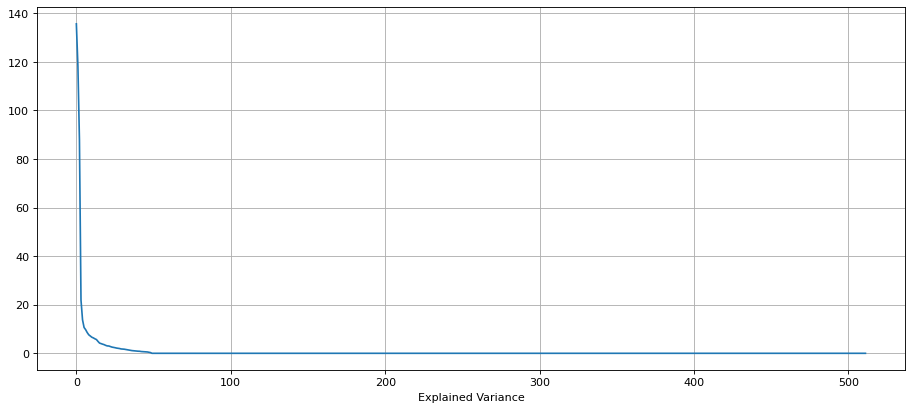

<Figure size 432x288 with 0 Axes>

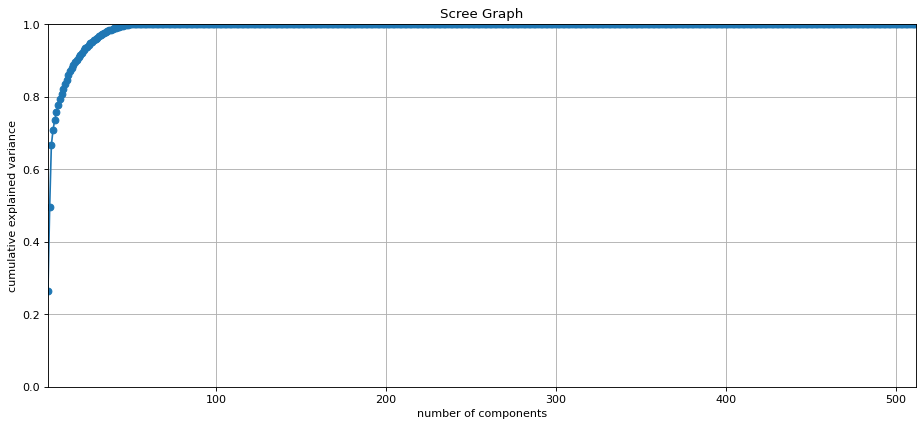

The number of total dimension: 512
The number of dimension to keep 0.8:            8


In [6]:
from utils import show_screegraph

show_screegraph(emb, 512, info_percent=0.8)

x: (1157, 512) projected_x: (1157, 512)


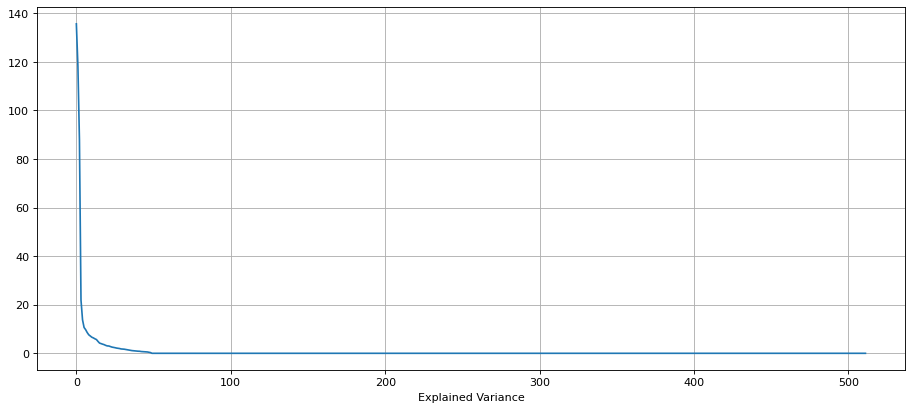

<Figure size 432x288 with 0 Axes>

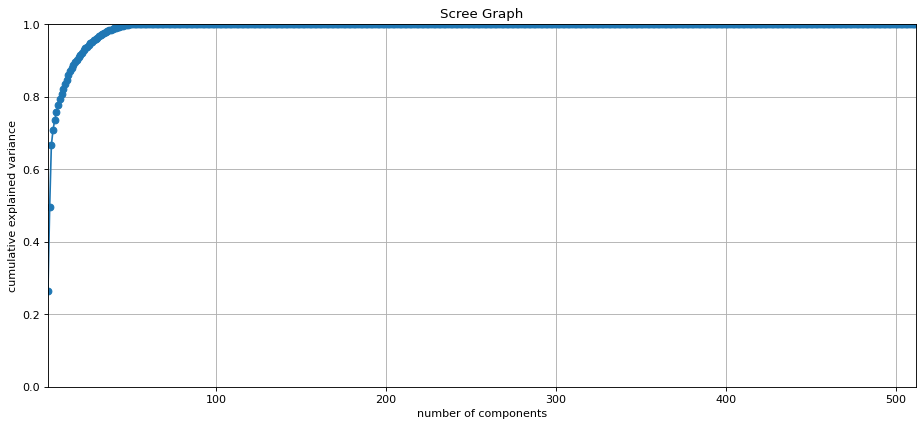

The number of total dimension: 512
The number of dimension to keep 0.95:            26


In [7]:
show_screegraph(emb, 512, info_percent=0.95)

# LDA